<a href="https://colab.research.google.com/github/proyectos-ds-alura/py1_pandas_est.Datos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [104]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(n=3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


#1. Análisis de facturación



In [95]:
#Cálculo del ingreso total de cada tienda

total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

totales_por_tienda = {
    'Tienda 1': total_tienda1,
    'Tienda 2': total_tienda2,
    'Tienda 3': total_tienda3,
    'Tienda 4': total_tienda4
}

print("Precios totales por tienda en pesos colombianos $ COP ")
for tienda, total in totales_por_tienda.items():
    print(f"{tienda}: {total:.2f}")

Precios totales por tienda en pesos colombianos $ COP 
Tienda 1: 1150880400.00
Tienda 2: 1116343500.00
Tienda 3: 1098019600.00
Tienda 4: 1038375700.00


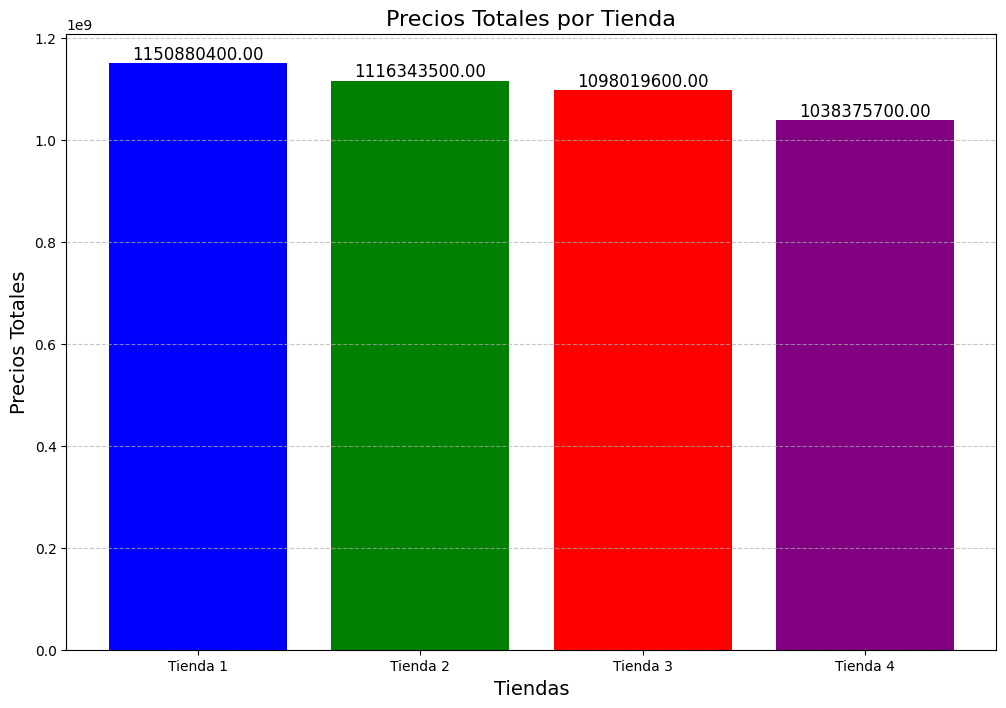

In [96]:
#grafico de los ingresos de las 4 tiendas
import matplotlib.pyplot as plt

#Configuración del gráfico
plt.figure(figsize=(12, 8))      #se configura dimensiones ancho x alto

#crear grafico de barras
bars = plt.bar(
    totales_por_tienda.keys(),                #eje x: nombre de las tiendas
    totales_por_tienda.values(),              #eje y: nombre de las tiendas
    color=['blue', 'green', 'red', 'purple']  #definimos colores de las barras
)

#Definir títulos y etiquetas
plt.title('Precios Totales por Tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=14)
plt.ylabel('Precios Totales', fontsize=14)

#Añadir valores encima de cada barra
for bar in bars:
  height = bar.get_height()               #altura de la barra(el ingreso total)
  plt.text(
      bar.get_x() + bar.get_width() / 2., #posicion x centrada en la barra
      height,                             #posicion y centrada en la barra
      f'{height:.2f}',                    #texto: el valor con 2 decimales
      ha='center',                        #alineacion horizontal
      va='bottom',                        #alineacion vertical
      fontsize=12
  )

#agregar lineas de guia horizontales
plt.grid(
    axis='y',       #solo en el eje 'y'
    linestyle='--', #lineas punteadas
    alpha=0.7       #transparencia de las lineas
)

#muestra el grafico
plt.show()


In [97]:
#Total de ingreso de ventas de todas las tiendas
precio_total = sum(totales_por_tienda.values())

print(f"\nPrecio total de las 4 tiendas, en pesos colombianos: {precio_total:.2f}")


Precio total de las 4 tiendas, en pesos colombianos: 4403619200.00


# 2. Ventas por categoría

In [100]:
#Contar por categoria para todas las tienas
#tienda
conteo_df_tienda1 = tienda['Categoría del Producto'].value_counts().reset_index()
conteo_df_tienda1.columns = ['Categoría del Producto', 'Cantidad']
conteo_df_tienda1['Tienda'] = 'Tienda 1'  # Etiqueta de tienda

#tienda2
conteo_df_tienda2 = tienda2['Categoría del Producto'].value_counts().reset_index()
conteo_df_tienda2.columns = ['Categoría del Producto', 'Cantidad']
conteo_df_tienda2['Tienda'] = 'Tienda 2'  # Etiqueta de tienda

# Para Tienda 3
conteo_df_tienda3 = tienda3['Categoría del Producto'].value_counts().reset_index()
conteo_df_tienda3.columns = ['Categoría del Producto', 'Cantidad']
conteo_df_tienda3['Tienda'] = 'Tienda 3'

# Para Tienda 4
conteo_df_tienda4 = tienda4['Categoría del Producto'].value_counts().reset_index()
conteo_df_tienda4.columns = ['Categoría del Producto', 'Cantidad']
conteo_df_tienda4['Tienda'] = 'Tienda 4'

In [101]:
#unir todo en un solo dataframe

conteo_total = pd.concat([
    conteo_df_tienda1,
    conteo_df_tienda2,
    conteo_df_tienda3,
    conteo_df_tienda4
], ignore_index=True)

conteo_total

,Categoría del Producto,Cantidad,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
7,Artículos para el hogar,171,Tienda 1
8,Muebles,442,Tienda 2
9,Electrónicos,422,Tienda 2


In [123]:
# Crear tabla pivote para tener tiendas como columnas y categorías como filas
pivot = conteo_total.pivot(index='Categoría del Producto', columns='Tienda', values='Cantidad').fillna(0)


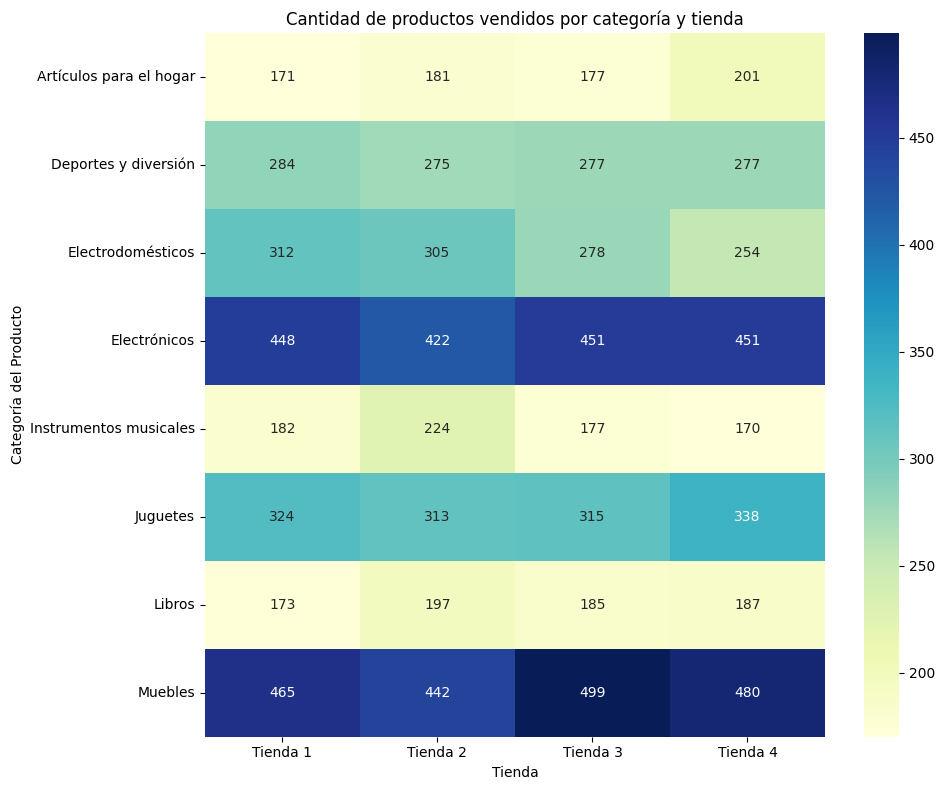

In [124]:
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')

plt.title('Cantidad de productos vendidos por categoría y tienda')
plt.xlabel('Tienda')
plt.ylabel('Categoría del Producto')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [102]:
#Calcular la suma total de las calificaciones de cada tienda
suma_cali_tienda1 = tienda['Calificación'].sum()
suma_cali_tienda2 = tienda2['Calificación'].sum()
suma_cali_tienda3 = tienda3['Calificación'].sum()
suma_cali_tienda4 = tienda4['Calificación'].sum()

#Total de calificaciones por tienda
total_cali_tienda1 = len(tienda)
total_cali_tienda2 = len(tienda2)
total_cali_tienda3 = len(tienda3)
total_cali_tienda4 = len(tienda4)

#Calcular el promedio de calificaciones por tienda
promedio_cali_tienda1 = suma_cali_tienda1 / total_cali_tienda1
promedio_cali_tienda2 = suma_cali_tienda2 / total_cali_tienda2
promedio_cali_tienda3 = suma_cali_tienda3 / total_cali_tienda3
promedio_cali_tienda4 = suma_cali_tienda4 / total_cali_tienda4

#Crear un diccionario con los datos obtenidos
promedios_cali_tiendas = {
    'Tienda 1': promedio_cali_tienda1,
    'Tienda 2': promedio_cali_tienda2,
    'Tienda 3': promedio_cali_tienda3,
    'Tienda 4': promedio_cali_tienda4
}

#Imprimir los resultados
print("Promedio de calificaciones por tienda:")
for tienda, promedio in promedios_cali_tiendas.items():
    print(f"{tienda}: {promedio:.2f}")







Promedio de calificaciones por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [105]:
#Saco el resumen de los productos con sus cantidades y se crea la columna cantidad, para cada tienda
conteo_df_producto_tienda1 = tienda['Producto'].value_counts().reset_index()
conteo_df_producto_tienda1.columns = ['Producto', 'Cantidad']
conteo_df_producto_tienda1['Tienda'] = 'Tienda 1'  # Agrego la columna 'Tienda'

conteo_df_producto_tienda2 = tienda2['Producto'].value_counts().reset_index()
conteo_df_producto_tienda2.columns = ['Producto', 'Cantidad']
conteo_df_producto_tienda2['Tienda'] = 'Tienda 2'

conteo_df_producto_tienda3 = tienda3['Producto'].value_counts().reset_index()
conteo_df_producto_tienda3.columns = ['Producto', 'Cantidad']
conteo_df_producto_tienda3['Tienda'] = 'Tienda 3'

conteo_df_producto_tienda4 = tienda4['Producto'].value_counts().reset_index()
conteo_df_producto_tienda4.columns = ['Producto', 'Cantidad']
conteo_df_producto_tienda4['Tienda'] = 'Tienda 4'

#combinar df en uno solo
conteo_total_productos = pd.concat([
    conteo_df_producto_tienda1,
    conteo_df_producto_tienda2,
    conteo_df_producto_tienda3,
    conteo_df_producto_tienda4
], ignore_index=True)


# Crear listas para almacenar resultados
mas_vendidos_total = []
menos_vendidos_total = []

#Iterar por cada tienda
for tienda_nombre in conteo_total_productos['Tienda'].unique():
  df_tienda = conteo_total_productos[conteo_total_productos['Tienda'] == tienda_nombre]

  cantidad_max = df_tienda['Cantidad'].max()
  cantidad_min = df_tienda['Cantidad'].min()

  mas_vendidos = df_tienda[df_tienda['Cantidad'] == cantidad_max]
  menos_vendidos = df_tienda[df_tienda['Cantidad'] == cantidad_min]

  mas_vendidos_total.append(mas_vendidos)
  menos_vendidos_total.append(menos_vendidos)

mas_vendidos_final = pd.concat(mas_vendidos_total, ignore_index=True)
menos_vendidos_final = pd.concat(menos_vendidos_total, ignore_index=True)

print("✅ Productos más vendidos por tienda:")
print(mas_vendidos_final)

print("\n🔻 Productos menos vendidos por tienda:")
print(menos_vendidos_final)


✅ Productos más vendidos por tienda:
                    Producto  Cantidad    Tienda
0                 Microondas        60  Tienda 1
1              TV LED UHD 4K        60  Tienda 1
2                    Armario        60  Tienda 1
3  Iniciando en programación        65  Tienda 2
4              Kit de bancas        57  Tienda 3
5                   Cama box        62  Tienda 4

🔻 Productos menos vendidos por tienda:
                    Producto  Cantidad    Tienda
0  Auriculares con micrófono        33  Tienda 1
1               Celular ABXY        33  Tienda 1
2              Juego de mesa        32  Tienda 2
3    Bloques de construcción        35  Tienda 3
4         Guitarra eléctrica        33  Tienda 4


# 5. Envío promedio por tienda

In [106]:
#Calcular el costo de envio de cada tienda
costo_tienda1 = tienda['Costo de envío'].sum()
costo_tienda2 = tienda2['Costo de envío'].sum()
costo_tienda3 = tienda3['Costo de envío'].sum()
costo_tienda4 = tienda4['Costo de envío'].sum()

#Calcular el promedio de costos por tienda
promedio_costo_t1 = costo_tienda1 / total_cali_tienda1
promedio_costo_t2 = costo_tienda2 / total_cali_tienda2
promedio_costo_t3 = costo_tienda3 / total_cali_tienda3
promedio_costo_t4 = costo_tienda4 / total_cali_tienda4

#Crear un diccionario
costos_promedios_tiendas = {
    'Tienda 1': promedio_costo_t1,
    'Tienda 2': promedio_costo_t2,
    'Tienda 3': promedio_costo_t3,
    'Tienda 4': promedio_costo_t4
}

#Imprimir los resultados
print("Promedio de costos por tienda, en pesos colombianos:")
for tienda, costo in costos_promedios_tiendas.items():
    print(f"{tienda}: {costo:.2f}")

Promedio de costos por tienda, en pesos colombianos:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


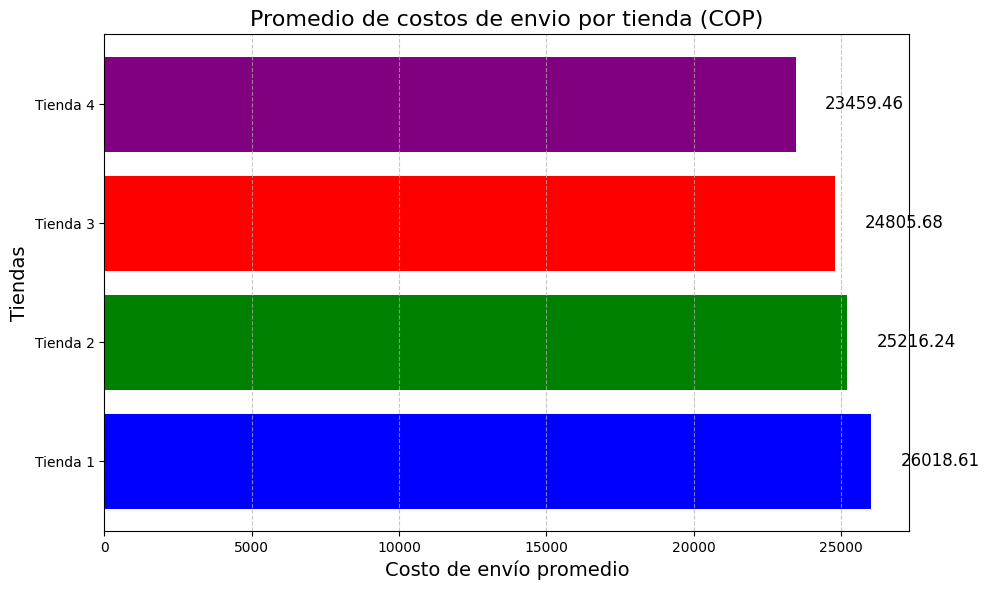

In [120]:
#Barras horizontales

plt.figure(figsize=(10,6))
bars_1 = plt.barh(
    list(costos_promedios_tiendas.keys()),
    list(costos_promedios_tiendas.values()),
    color=['blue', 'green', 'red', 'purple']
    # color='mediumseagreen'
)

#agregar valores al final de cada barra
for index, value in enumerate(costos_promedios_tiendas.values()):
    plt.text(
        value + 1000,    # un poco a la derecha de la barra
        index,          # la altura (posición vertical) de la barra
        f'{value:.2f}', # Formato con $ y dos decimales. Ej: "$3,125.00"
        va='center',
        fontsize=12
    )

plt.title('Promedio de costos de envio por tienda (COP)', fontsize=16)
plt.xlabel('Costo de envío promedio', fontsize=14)
plt.ylabel('Tiendas', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Informe de análisis de resultados por tienda

## 1. Introducción
Este análisis presenta un resumen de las categorías de productos más y menos vendidos en cuatro tiendas, junto con los costos de envío promedios.

## 2. Productos más y menos vendidos
Se identificaron los productos con mayor y menor frecuencia de venta en cada tienda. Esto se visualizó mediante un gráfico de barras y un heatmap.

## 3. Costos de Envío Promedio
Se calculó el promedio del costo de envío por tienda:


| Tienda    | Costo Promedio     |
|-----------|--------------------|
| Tienda 1  | $26018.61 COP      |
| Tienda 2  | $25216.24 COP      |
| Tienda 3  | $24805.68 COP      |
| Tienda 4  | $23459.46 COP      |




## 4. Conclusiones

En base a los datos obtenidos y teniendo en cuenta los graficos, podemos recomendar vender la tienda 1, ya que, si bien es cierto, que es la que vende más también es la que tiene el mayor costo de envío y una muy baja calificación, por parte de los clientes